In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


pd.set.option('display.max_columns', None)
# ('display.max_columns', None) corresponds to (rows, columns)
# We can set the limit to display rows and columns, currently we are displaying max rows and max columns
# pd.set.option('display.max_columns', 5) this will display only 5 columns

AttributeError: module 'pandas' has no attribute 'set'

In [3]:
# Read the csv file
flights = pd.read_csv('flights.csv')

# Determine the size or shape of data structure
flights.shape

(56044, 31)

In [4]:
flights

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,2015,1,4,7,B6,532,N821JB,LGB,SLC,1520,...,1801.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
56040,2015,1,4,7,B6,573,N760JB,EWR,TPA,1520,...,1922.0,59.0,0,0,NaN,26.0,0.0,10.0,23.0,0.0
56041,2015,1,4,7,B6,700,N508JB,LAX,FLL,1520,...,2320.0,19.0,0,0,NaN,3.0,0.0,6.0,10.0,0.0
56042,2015,1,4,7,B6,846,N580JB,MCO,SWF,1520,...,1917.0,76.0,0,0,NaN,0.0,0.0,0.0,47.0,29.0


In [5]:
#If you want to see only a couple of data points then do this, it will show you only the first 5 data points
flights.head()

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#If you want to see specific number of data points then do this, you can specify how many you want to see
flights.head(10)

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


DATA EXPLORATION STEPS

-> Missing values

-> Outliers

-> Categorical values

-> Binary values

-> Column types

In [7]:
flights.columns

Index(['YEAR_', 'MONTH_', 'DAY_', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [8]:
# Specify the columns you want and eliminate the rest
flights = flights[['YEAR_', 'MONTH_', 'DAY_', 'DAY_OF_WEEK', 'AIRLINE',
    'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [9]:
flights.head()

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN


-> Missing values

In [10]:
# Checking the missing values
flights.isna().sum()

YEAR_                      0
MONTH_                     0
DAY_                       0
DAY_OF_WEEK                0
AIRLINE                    0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1226
DEPARTURE_DELAY         1226
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1289
ARRIVAL_DELAY           1389
CANCELLED                  0
CANCELLATION_REASON    54781
AIR_SYSTEM_DELAY       37711
SECURITY_DELAY         37711
AIRLINE_DELAY          37711
LATE_AIRCRAFT_DELAY    37711
WEATHER_DELAY          37711
dtype: int64

In [11]:
flights[flights['ARRIVAL_DELAY'].isna()]

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55902,2015,1,4,7,MQ,ORD,FNT,1510,NaN,NaN,1718,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
55927,2015,1,4,7,EV,BNA,EWR,1513,NaN,NaN,1825,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
55992,2015,1,4,7,MQ,ORD,DTW,1515,NaN,NaN,1728,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
56008,2015,1,4,7,MQ,ORD,BNA,1518,NaN,NaN,1641,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN


In [12]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56031,2015,1,4,7,AA,OKC,DFW,1520,NaN,NaN,1625,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
56033,2015,1,4,7,AA,SDF,DFW,1520,1518.0,-2.0,1640,1629.0,-11.0,0,NaN,NaN,NaN,NaN,NaN,NaN
56034,2015,1,4,7,AA,SAN,DFW,1520,1515.0,-5.0,2015,2006.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
56038,2015,1,4,7,AS,SEA,PSP,1520,1515.0,-5.0,1751,1735.0,-16.0,0,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'YEAR_'}>,
        <Axes: title={'center': 'MONTH_'}>,
        <Axes: title={'center': 'DAY_'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

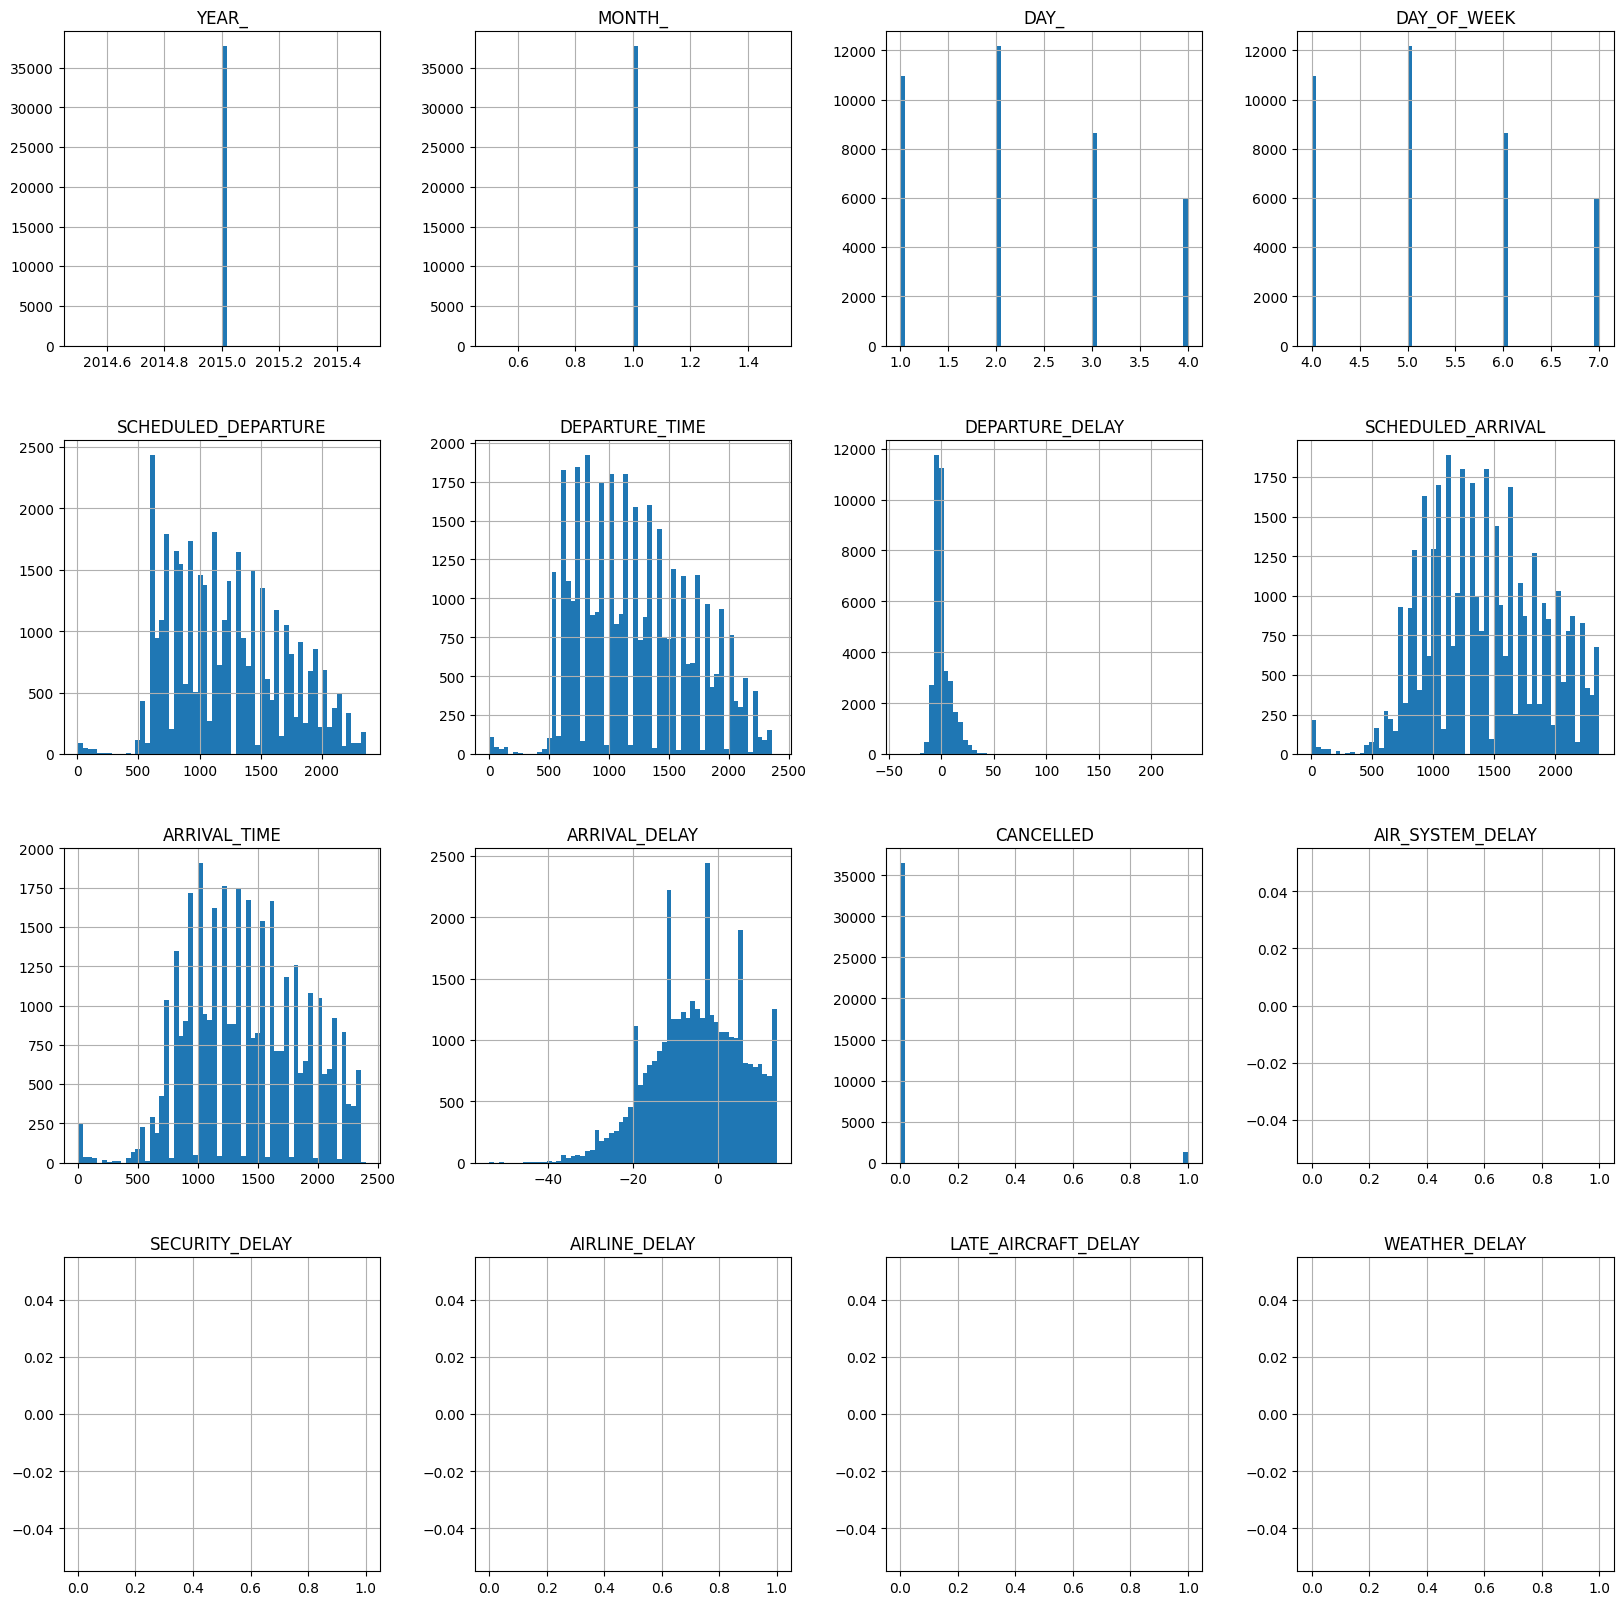

In [13]:
# Plotting histogram for na_values
na_values.hist(bins=60, figsize=(20,20))

In [14]:
na_values[na_values['ARRIVAL_DELAY']>13]

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
94,2015,1,1,4,UA,IAD,IAH,535,541.0,6.0,802,816.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
109,2015,1,1,4,EV,ATL,IAD,540,556.0,16.0,725,739.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
181,2015,1,1,4,UA,RNO,DEN,600,557.0,-3.0,910,924.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
204,2015,1,1,4,AA,MIA,PHL,600,604.0,4.0,844,858.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
490,2015,1,1,4,F9,SLC,DEN,615,617.0,2.0,747,801.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55608,2015,1,4,7,DL,ATL,IAH,1455,1502.0,7.0,1614,1628.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
55609,2015,1,4,7,DL,ATL,CAK,1455,1527.0,32.0,1641,1655.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
55780,2015,1,4,7,OO,DEN,TUL,1503,1520.0,17.0,1737,1751.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
55950,2015,1,4,7,WN,MSY,DAL,1515,1532.0,17.0,1640,1654.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55902,2015,1,4,7,MQ,ORD,FNT,1510,NaN,NaN,1718,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
55927,2015,1,4,7,EV,BNA,EWR,1513,NaN,NaN,1825,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
55992,2015,1,4,7,MQ,ORD,DTW,1515,NaN,NaN,1728,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
56008,2015,1,4,7,MQ,ORD,BNA,1518,NaN,NaN,1641,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN


In [16]:
arrival_na['CANCELLED'].value_counts()

CANCELLED
1    1263
0     126
Name: count, dtype: int64

In [17]:
# Removing the NA values from ARRIVAL_DELAY
flights = flights[~flights['ARRIVAL_DELAY'].isna()]
flights

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,2015,1,4,7,B6,LGB,SLC,1520,1518.0,-2.0,1802,1801.0,-1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
56040,2015,1,4,7,B6,EWR,TPA,1520,1553.0,33.0,1823,1922.0,59.0,0,NaN,26.0,0.0,10.0,23.0,0.0
56041,2015,1,4,7,B6,LAX,FLL,1520,1536.0,16.0,2301,2320.0,19.0,0,NaN,3.0,0.0,6.0,10.0,0.0
56042,2015,1,4,7,B6,MCO,SWF,1520,1645.0,85.0,1801,1917.0,76.0,0,NaN,0.0,0.0,0.0,47.0,29.0


In [18]:
flights.isna().sum()

YEAR_                      0
MONTH_                     0
DAY_                       0
DAY_OF_WEEK                0
AIRLINE                    0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
CANCELLED                  0
CANCELLATION_REASON    54655
AIR_SYSTEM_DELAY       36322
SECURITY_DELAY         36322
AIRLINE_DELAY          36322
LATE_AIRCRAFT_DELAY    36322
WEATHER_DELAY          36322
dtype: int64

In [19]:
# Fill in the NA values 
flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(0)
flights

,YEAR_,MONTH_,DAY_,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,2015,1,4,7,B6,LGB,SLC,1520,1518.0,-2.0,1802,1801.0,-1.0,0,NaN,0.0,0.0,0.0,0.0,0.0
56040,2015,1,4,7,B6,EWR,TPA,1520,1553.0,33.0,1823,1922.0,59.0,0,NaN,26.0,0.0,10.0,23.0,0.0
56041,2015,1,4,7,B6,LAX,FLL,1520,1536.0,16.0,2301,2320.0,19.0,0,NaN,3.0,0.0,6.0,10.0,0.0
56042,2015,1,4,7,B6,MCO,SWF,1520,1645.0,85.0,1801,1917.0,76.0,0,NaN,0.0,0.0,0.0,47.0,29.0


In [20]:
flights.isna().sum()

YEAR_                      0
MONTH_                     0
DAY_                       0
DAY_OF_WEEK                0
AIRLINE                    0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
CANCELLED                  0
CANCELLATION_REASON    54655
AIR_SYSTEM_DELAY           0
SECURITY_DELAY             0
AIRLINE_DELAY              0
LATE_AIRCRAFT_DELAY        0
WEATHER_DELAY              0
dtype: int64

-> Outliers